In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import re
import string

In [40]:
data_fake = pd.read_csv("Fake.csv")
data_real = pd.read_csv("True.csv")

In [41]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [42]:
data_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [43]:
data_fake["class"] =0
data_real["class"] =1

In [44]:
data_fake.shape, data_real.shape

((23481, 5), (21417, 5))

In [45]:
data_fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [46]:
data_real.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [47]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,23470,-1):
    data_fake.drop([i], axis = 0, inplace = True)

data_real_manual_testing = data_real.tail(10)
for i in range(21416,21406,-1):
    data_real.drop([i], axis = 0, inplace = True)

In [48]:
data_fake.shape, data_real.shape

((23471, 5), (21407, 5))

In [49]:
data_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [50]:
data_real_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [51]:
data_merge = pd.concat([data_fake, data_real], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [52]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [53]:
data_merge['class'].value_counts()

class
0    23471
1    21407
Name: count, dtype: int64

In [54]:
# drop irrelevant columns
data = data_merge.drop(["title", "subject", "date"], axis = 1)

In [55]:
# drop null values(no in this case)
data.isnull().sum()

text     0
class    0
dtype: int64

In [56]:
# random shuffling of rows
# to reset use (data = data.sample(frac=1).reset_index(drop=True))---- drop = True drops old index from it
data = data.sample(frac = 1)

In [57]:
data.head()

,text,class
660,Donald Trump doesn t just flip flop on his cam...,0
5826,In the days following the massacre at the Puls...,0
4353,BEIRUT (Reuters) - Syrian warplanes took off f...,1
7005,Newly released surveillance video shows that a...,0
23376,21st Century Wire says NSA and police state ch...,0


In [58]:
data.reset_index(drop = True, inplace = True)

In [59]:
data.columns

Index(['text', 'class'], dtype='object')

In [60]:
data.head()

,text,class
0,Donald Trump doesn t just flip flop on his cam...,0
1,In the days following the massacre at the Puls...,0
2,BEIRUT (Reuters) - Syrian warplanes took off f...,1
3,Newly released surveillance video shows that a...,0
4,21st Century Wire says NSA and police state ch...,0


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '',text)     #( clears out text in brackets)
    # .* matches all inside except newline, ? is for non greedy (stops  with first closing bracket and not eliminates till last bracket,\ is used with [and ] for escape characters
    text = re.sub("\\W", " ", text)  # ( replaces all other than word characters with a space)
    # /w is a word(letter,number,_) in regex and /W is not a word , we use one more / as / is escape in python
    text = re.sub('https?://\S+|www\.\S+', '', text)  # replaces both types of URLs
    # \s : whitespace character (space, tab, newline) , \S (not white-space ) and + means 1 or more
    # In regular expressions, a plain . means "match any character except newline" that's why we escaped it as \. (a literal .)
    text = re.sub('<.*?>+', '', text)  #( removes HTML tags)
    # + in regex means “match one or more occurrences of the preceding pattern.”
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)   
    
    return text

<>:9: SyntaxWarning: invalid escape sequence '\['
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:20: SyntaxWarning: invalid escape sequence '\w'
<>:9: SyntaxWarning: invalid escape sequence '\['
<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:20: SyntaxWarning: invalid escape sequence '\w'
C:\Users\K\AppData\Local\Temp\ipykernel_14920\2649345278.py:9: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '',text)     #( clears out text in brackets)
C:\Users\K\AppData\Local\Temp\ipykernel_14920\2649345278.py:13: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)  # replaces both types of URLs
C:\Users\K\AppData\Local\Temp\ipykernel_14920\2649345278.py:20: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


In [63]:
#after stemming

text = "The news articles are misleading and were misrepresented in several ways."
print(clean_text(text))

the news articl are mislead and were misrepres in sever way


In [69]:
from tqdm import tqdm
tqdm.pandas()

data['text'] = data['text'].progress_apply(clean_text)

100%|██████████| 44878/44878 [12:33<00:00, 59.57it/s] 


In [70]:
# for dependant and independant variabels
x = data['text']
y = data['class']

In [71]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

### Vectorization
Converting text (words, sentences) into numbers (vectors) that a computer can understand and use for machine learning.

TfidfVectorizer penalizes common words and gives more weight to rare but important words


In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization =TfidfVectorizer(stop_words='english')
xv_train = vectorization.fit_transform(x_train)  # learn + apply (on train data)
xv_test = vectorization.transform(x_test)        # only apply (on train data using already learned ones)

In [73]:
print(xv_train)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4836853 stored elements and shape (33658, 70660)>
  Coords	Values
  (0, 29619)	0.06446279916954754
  (0, 52013)	0.032164236450341034
  (0, 45800)	0.26627057951272
  (0, 24906)	0.03870309209565655
  (0, 62845)	0.038948853321972864
  (0, 21293)	0.05366417887728604
  (0, 22008)	0.060152804511095816
  (0, 1150)	0.09903375826131779
  (0, 24395)	0.2800587169220377
  (0, 11662)	0.05649567430838542
  (0, 64726)	0.062344103984290467
  (0, 983)	0.02862550068347072
  (0, 53797)	0.12218080281568047
  (0, 67765)	0.026159436009536224
  (0, 28586)	0.02077615204036292
  (0, 10441)	0.20193293306312188
  (0, 26041)	0.0538301603113563
  (0, 6312)	0.04159120850792285
  (0, 47218)	0.07352536529366636
  (0, 22808)	0.03719898349116978
  (0, 58115)	0.1083325776038223
  (0, 63118)	0.0683940471358129
  (0, 58833)	0.0439043211218122
  (0, 16542)	0.04097376142325954
  (0, 29205)	0.11334835606336809
  :	:
  (33657, 12560)	0.06673310986474001
  (33657, 3

In [74]:
from xgboost import XGBClassifier

XGB = XGBClassifier(n_estimators=100, max_depth=3)
XGB.fit(xv_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [75]:
pred_xgb = XGB.predict(xv_test)

In [76]:
XGB.score(xv_test,y_test)

0.9962566844919786

In [81]:
print(classification_report(y_test, pred_xgb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5886
           1       0.99      1.00      1.00      5334

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [79]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not a Fake News"

# Converted to DataFrame so: You could preprocess the input same as training data ,access it by column name "text"
# You could apply .apply(wordopt) and vectorization.transform() without rewriting the pipeline and use pandas DataFRame functions
def manual_testing(news):
    testing_news = {"text" : [news]}
    new_def_test= pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(clean_text)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_xgb = XGB.predict(new_xv_test)

    return print("\n\n Prediction : {}".format(output_label(pred_xgb[0])))

# When you call predict() on a scikit-learn model like LR.predict(new_xv_test), it returns an array of predictions.
# So use [0] to get first index value of that array

In [41]:
news = input()
manual_testing(news)



 Prediction : Not a Fake News


In [42]:
news = input()
manual_testing(news)



 Prediction : Fake News


Text(45.722222222222214, 0.5, 'Truth')

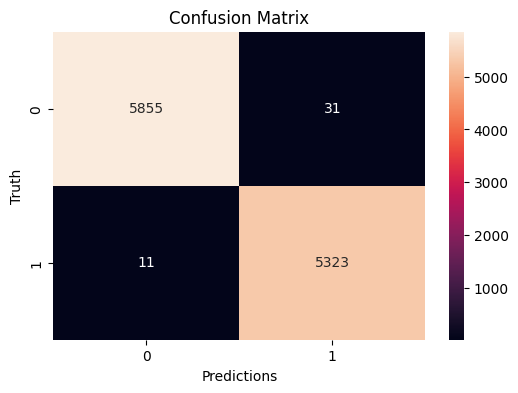

In [80]:
cm = confusion_matrix(y_test,pred_xgb)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.title("Confusion Matrix")
plt.xlabel("Predictions")
plt.ylabel("Truth")


In [52]:
import joblib

joblib.dump(vectorization, 'vectorizer.jb')
joblib.dump(XGB, 'model.jb')

['model.jb']